In [5]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
from common.optimizer import *

In [6]:
# class AdaDelta:
#     """AdaDelta"""
    
#     def __init__(self, lr=0.01, decay_rate=0.99):
#         self.lr = lr
#         self.decay_rate = decay_rate
#         self.h = None
#         self.s = None
        
#     def update(self, params, grads):
#         if self.h is None:
#             self.h = {}
#             for key, val in params.items():
#                 self.h[key] = np.zeros_like(val)
        
#         elif self.s is None:
#             self.s = {}
#             for key, val in params.items():
#                 self.s[key] = np.zeros_like(val)
                
#         for key in params.keys():
#             dx = np.sqrt((self.s[key]+1e-7) / (self.h[key]+1e-7)) * grads[key]
#             self.h[key] *= self.decay_rate
#             self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
#             self.s[key] *= self.decay_rate
#             self.s[key] += (1 - self.decay_rate) * dx * dx
#             params[key] -= dx

In [7]:
class AdaDelta:
    """AdaDelta"""
    
    def __init__(self, lr=0.01, decay_rate=0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        self.s = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        elif self.s is None:
            self.s = {}
            for key, val in params.items():
                self.s[key] = np.zeros_like(val)
                
        for key in params.keys():
            dx = np.sqrt((self.s[key]+1e-7) / (self.h[key]+1e-7)) * grads[key]
            self.h[key] = self.decay_rate*self.h[key] + (1 - self.decay_rate) * grads[key] * grads[key]
            self.s[key] = self.decay_rate*self.s[key] + (1 - self.decay_rate) * dx * dx
            params[key] -= dx

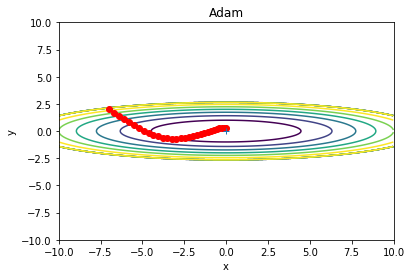

In [8]:
def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
# optimizers["SGD"] = SGD(lr=0.95)
# optimizers["Momentum"] = Momentum(lr=0.1)
# optimizers["AdaGrad"] = AdaGrad(lr=1.5)
# optimizers["AdaDelta"] = AdaGrad(lr=1.0)
# optimizers["RMSProp"] = RMSprop(lr=0.1)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(1, 1, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

===========iteration:0===========
Adam:2.2490845247
RMSProp:165.912722509
AdaGrad:2.12117140444
AdaDelta:2.34463841262
SGD:2.42893963142
Momentum:2.29106694563
===========iteration:100===========
Adam:0.381702473949
RMSProp:0.724016962446
AdaGrad:0.195428944736
AdaDelta:0.208930367097
SGD:1.4362420093
Momentum:0.383070739697
===========iteration:200===========
Adam:0.139464013967
RMSProp:0.166397554437
AdaGrad:0.104625460269
AdaDelta:0.113275237391
SGD:0.607940418668
Momentum:0.242137429706
===========iteration:300===========
Adam:0.120861947697
RMSProp:0.117192297392
AdaGrad:0.0823777556623
AdaDelta:0.0687409321957
SGD:0.46878449807
Momentum:0.162237015074
===========iteration:400===========
Adam:0.165384796994
RMSProp:0.146434999481
AdaGrad:0.133943118697
AdaDelta:0.13201918899
SGD:0.427003361609
Momentum:0.195749589506
===========iteration:500===========
Adam:0.204630240237
RMSProp:0.159735008837
AdaGrad:0.0864180109306
AdaDelta:0.083580403858
SGD:0.319111376916
Momentum:0.209855729

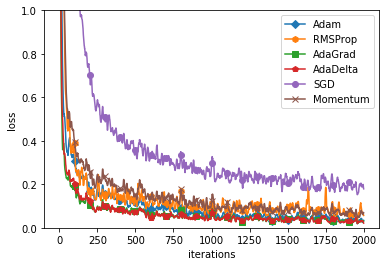

In [11]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers["SGD"] = SGD()
optimizers["Momentum"] = Momentum()
optimizers["AdaGrad"] = AdaGrad()
optimizers["AdaDelta"] = AdaGrad()
optimizers["RMSProp"] = RMSprop()
optimizers["Adam"] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "AdaDelta": "p", "RMSProp": "h", "Adam": "D" }
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()